In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import GridSearchCV

import joblib

In [3]:
X_train = pd.read_csv('saved/X_train.csv')
y_train = pd.read_csv('saved/y_train.csv')
X_test = pd.read_csv('saved/X_test.csv')
y_test = pd.read_csv('saved/y_test.csv')

In [4]:
pipe = Pipeline([('scale', StandardScaler()),
                 ('selector', SelectKBest(mutual_info_regression)),
                 ('poly', PolynomialFeatures()),
                 ('model', Ridge())])
k=[3, 4, 5, 6, 7, 10]
alpha=[1, 0.5, 0.2, 0.1, 0.05, 0.02, 0.01]
poly = [1, 2, 3, 5, 7]
grid = GridSearchCV(estimator = pipe,
                    param_grid = dict(selector__k=k,
                                      poly__degree=poly,
                                      model__alpha=alpha),
                    cv = 3,
                   scoring = 'r2')

print("Entrenando modelo...")
grid.fit(X_train, y_train)
print("Modelo entrenado con exito!...")
y_predicted = grid.predict(X_test)

# evaluar modelo
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# printing values
print('RMSE: ', rmse)
print('R2: ', r2)

Entrenando modelo...


C:\Users\maumr\anaconda3\envs\pipelines\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maumr\anaconda3\envs\pipelines\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maumr\anaconda3\envs\pipelines\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\maumr\anaconda3\envs\pipelines\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array w

Modelo entrenado con exito!...
RMSE:  157.2002053958611
R2:  0.8346294297690904


In [5]:
grid.best_params_

{'model__alpha': 0.1, 'poly__degree': 1, 'selector__k': 7}

In [6]:
X_train.columns[grid.best_estimator_.named_steps['selector'].get_support()]

Index(['Precio_leche_shift3_mean', 'PIB_Otras_actividades_mineras_shift3_mean',
       'PIB_Alimentos_shift3_mean', 'PIB_Refinacion_de_petroleo_shift3_mean',
       'PIB_Administracion_publica_shift3_mean', 'Precio_leche_mes_anterior',
       'PIB_Administracion_publica_mes_anterior'],
      dtype='object')

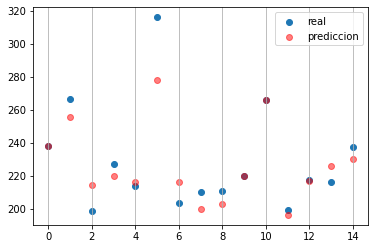

In [7]:
predicted = pd.DataFrame(y_test).reset_index(drop = True)
predicted['predicc'] = y_predicted
predicted= predicted.reset_index()
plt.scatter(predicted.index, predicted['Precio_leche'], label = 'real')
plt.scatter(predicted.index, predicted['predicc'], color = 'red', label = 'prediccion', alpha = 0.5)
plt.grid(axis = 'x')
plt.legend()

Text(0, 0.5, 'Residuo (y_real - y_pred)')

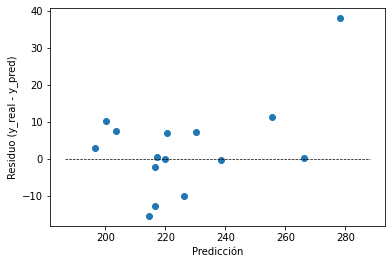

In [8]:
predicted['residual'] = predicted.Precio_leche - predicted.predicc
plt.hlines(0, xmin = predicted.predicc.min()-10, xmax = predicted.predicc.max()+10, linestyle='--', color = 'black', linewidth = 0.7)
plt.scatter(predicted.predicc, predicted.residual)
plt.xlabel('Predicción')
plt.ylabel('Residuo (y_real - y_pred)')

In [13]:
print("Guardando modelo... ")
joblib.dump(grid, f'models/modelo_{datetime.datetime.now().timestamp()}.pkl')
joblib.dump(grid, 'models/modelo_latest.pkl')
print("Modelo guardado!")

Guardando modelo... 
Modelo guardado!
